In [ ]:
!pip install kaggle

In [29]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

# Definir o caminho onde o arquivo kaggle.json está salvo
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\valde\Downloads\prova_dv'

# Inicializar a API do Kaggle
api = KaggleApi()
api.authenticate()

# Baixar o dataset
df = 'umerhaddii/paris-olympic-medalists-2024'
api.dataset_download_files(dataset, path='datasets/', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/umerhaddii/paris-olympic-medalists-2024


In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

# Autenticar no Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\valde\Downloads\prova_dv'
api = KaggleApi()
api.authenticate()

# Baixar o dataset
dataset = 'umerhaddii/paris-olympic-medalists-2024'
api.dataset_download_files(dataset, path='datasets/', unzip=True)

# Carregar o dataset
file_path = r'C:\Users\valde\Downloads\prova_dv\datasets\2024_medalists_all.csv' 
df = pd.read_csv(file_path)

# Verifique se o DataFrame foi carregado corretamente
print(df.head())




Dataset URL: https://www.kaggle.com/datasets/umerhaddii/paris-olympic-medalists-2024
  medalist_wikidata_id                                      medalist_link  \
0            Q11739253  https://en.wikipedia.org/wiki/Kim_Woo-jin_(arc...   
1             Q1156472        https://en.wikipedia.org/wiki/Brady_Ellison   
2            Q18001487         https://en.wikipedia.org/wiki/Lee_Woo-seok   
3           Q107619893          https://en.wikipedia.org/wiki/Kim_Je-deok   
4            Q11739253  https://en.wikipedia.org/wiki/Kim_Woo-jin_(arc...   

   medalist_name   medal delegation_wikidata_id  \
0    Kim Woo-jin    gold             Q114753595   
1  Brady Ellison  silver             Q113581713   
2   Lee Woo-seok  bronze             Q114753595   
3    Kim Je-deok    gold             Q114753595   
4    Kim Woo-jin    gold             Q114753595   

                                     delegation_link  \
0  https://en.wikipedia.org/wiki/South_Korea_at_t...   
1  https://en.wikipedia.org/wiki/

In [38]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicates: {duplicates}')

# Remove duplicates
data = df.drop_duplicates()



Number of duplicates: 0


In [45]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
country_medal_wikidata_id                   7
country_medal                               7
country_medal_code2                        17
country_medal_code3                        17
country_medal_ioc_country_code              7
country_medal_NUTS_code                  1202
date_of_birth                              17
place_of_birth_wikidata_id                 94
place_of_birth                             95
place_of_birth_located_in_wikidata_id     133
place_of_birth_located_in                 134
place_of_birth_coordinates                 95
lat                                        95
lon                                        95
event_part_of_wikidata_id                  20
event_part_of                              20
event_sport_wikidata_id                   733
event_sport                               733
event_part_of_sport_wikidata_id            69
event_part_of_sport                        69
sport_wikidata_id                          20
spo

In [69]:
# Check available columns in the DataFrame
print("Available columns in the DataFrame:")
print((data.columns.tolist()))

# Now, you can update the columns_to_drop based on the available columns
# For demonstration, let's adjust the drop list based on the actual columns
columns_to_drop = [
    # Add the columns you wish to drop after verifying their existence
    # 'nuts1_id', 'nuts1_name', 'nuts2_id', 'nuts2_name', 
    # 'nuts3_id', 'nuts3_name', 'nuts2_population', 
    # 'nuts3_population', 'nuts2_gdp', 'nuts3_gdp', 
    # 'nuts0_id', 'nuts0_name'
    # 'place_of_birth'
    #'country_medal_code3',
    #'place_of_birth_wikidata_id',
    #'place_of_birth_located_in_wikidata_id',
    #'place_of_birth_coordinates',
    #'event_wikidata_id',
    #'event_part_of_wikidata_id',
    #'event_sport_wikidata_id',
    #'event_part_of_sport_wikidata_id',
    #'sport_wikidata_id
]

data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

print("Remaining columns after dropping:")
print((data.columns.tolist()))

Available columns in the DataFrame:
['medalist_wikidata_id', 'medalist_link', 'medalist_name', 'medal', 'delegation_wikidata_id', 'delegation_link', 'delegation_name', 'country_medal_wikidata_id', 'country_medal', 'country_medal_code2', 'country_medal_ioc_country_code', 'country_medal_NUTS_code', 'date_of_birth', 'place_of_birth', 'place_of_birth_located_in', 'lat', 'lon', 'sex_or_gender_wikidata_id', 'sex_or_gender', 'event_link', 'event_name', 'event_part_of', 'event_sport', 'event_part_of_sport', 'sport']
Remaining columns after dropping:
['medalist_wikidata_id', 'medalist_link', 'medalist_name', 'medal', 'delegation_wikidata_id', 'delegation_link', 'delegation_name', 'country_medal_wikidata_id', 'country_medal', 'country_medal_code2', 'country_medal_ioc_country_code', 'country_medal_NUTS_code', 'date_of_birth', 'place_of_birth', 'place_of_birth_located_in', 'lat', 'lon', 'sex_or_gender_wikidata_id', 'sex_or_gender', 'event_link', 'event_name', 'event_part_of', 'event_sport', 'event

In [77]:
# Step 2: Data Analysis
# Analyze the distribution of medals by country
medals_by_country = data['country_medal'].value_counts()
print(medals_by_country)

country_medal
United States of America      305
France                        181
People's Republic of China    164
United Kingdom                149
Australia                     118
                             ... 
Panama                          1
Mongolia                        1
Dominica                        1
Cape Verde                      1
Zambia                          1
Name: count, Length: 89, dtype: int64


In [78]:
# Analyze the distribution of medals by medal type
medals_by_type = data['medal'].value_counts()
print(medals_by_type)

medal
bronze    758
gold      722
silver    722
Name: count, dtype: int64


In [86]:
import streamlit as st

In [87]:
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')
data['age'] = (pd.Timestamp('2024-01-01') - data['date_of_birth']).dt.days // 365

2024-10-18 17:54:33.176 
  command:

    streamlit run C:\Users\valde\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

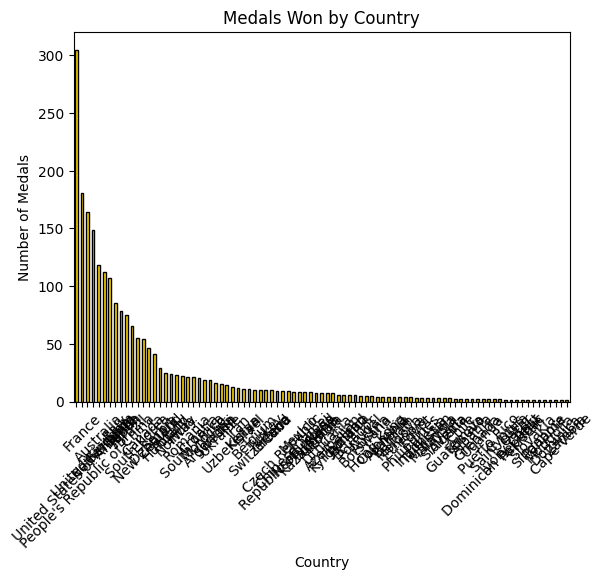

In [88]:
# Streamlit Title
st.title('Olympic Medalists Data Visualization')

# 1. Medals by Country (Bar Graph)
st.subheader('Medals Won by Country')
medals_by_country = data['country_medal'].value_counts()

fig1, ax1 = plt.subplots()
medals_by_country.plot(kind='bar', color='gold', edgecolor='black', ax=ax1)
ax1.set_title('Medals Won by Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Medals')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
st.pyplot(fig1)


In [90]:
# 3. Age Distribution (Histogram)
st.subheader('Age Distribution of Medalists')
fig3, ax3 = plt.subplots()
ax3.hist(data['age'].dropna(), bins=10, color='skyblue', edgecolor='black')
ax3.set_title('Age Distribution of Medalists')
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Medalists')
ax3.grid(axis='y')
st.pyplot(fig3)

DeltaGenerator()

In [91]:
# 5. Geographical Distribution (Scatter Plot)
st.subheader('Geographical Distribution of Medalists\' Places of Birth')
fig5, ax5 = plt.subplots()
ax5.scatter(data['lon'], data['lat'], alpha=0.5)
ax5.set_title('Geographical Distribution of Medalists\' Places of Birth')
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')
ax5.grid()
st.pyplot(fig5)

DeltaGenerator()